Gamelab data analysis

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pickle
from common_functions import get_clean_data
from common_functions import get_player_game_info, get_player_game_data, string_to_list, rational_to_double

# master (1 session), TSE (0-6 sessions), or Mturk (0-4 sessions)
exp = "mturk"
ses = "4"
all_choices = get_clean_data(exp,ses,"choice")
all_players = get_clean_data(exp,ses,"player")
all_games = get_clean_data(exp,ses,"game")
all_payoffs = get_clean_data(exp,ses,"payoff")
all_pasts = get_clean_data(exp,ses,"past")
all_gameplays = get_clean_data(exp,ses,"gameplay")
all_games = all_games.sort_values(['id']).reset_index(drop=True)
all_pasts = all_pasts.sort_values(['round','gameid']).reset_index(drop=True)

all_pasts.currentsp1 = all_pasts.currentsp1.apply(string_to_list)
all_pasts.currentsp2 = all_pasts.currentsp2.apply(string_to_list)

lis = [all_payoffs, all_choices, all_players, all_games, all_pasts, all_gameplays]

How does the data look like:

In [40]:
print('Choices:')
print(all_choices.head())
print('***********************************')
print('Players:')
print(all_players.head())
print('***********************************')
print('Games:')
print(all_games.head())
print('***********************************')
print('Payoffs:')
print(all_payoffs.head())
print('***********************************')
print('Pasts:')
print(all_pasts.head())
print('***********************************')
print('Gameplays:')
print(all_gameplays.head())

Choices:
   Unnamed: 0  playerid  round       strats  stratsz  gameid  sessid  \
0           1       215      1      0 1 0 0        4       3     433   
1           2       215      8          1 0        2       1     433   
2           3       215     29  1/2 1/2 0 0        4       3     433   
3           4       215     15          1 0        2       1     433   
4           5       215      7          1 0        2       1     433   

      created    id  globalid  
0  1550851509  2987       107  
1  1550851940  3230       107  
2  1550853197  4242       107  
3  1550852358  3515       107  
4  1550851879  3191       107  
***********************************
Players:
   Unnamed: 0   id           email                           hitid  \
0           1  215  A191V7PT3DQKDP  3X7837UUAEI6PFS0E53ZOJI9XDZJ6W   
1           2  216  A35QG1M8RGDUPC  3X7837UUAEI6PFS0E53ZOJI9XDZJ6W   
2           3  218   ALZVG5501Y5IX  3X7837UUAEI6PFS0E53ZOJI9XDZJ6W   
3           4  219  A25JCKN3DMCYA0  3X783

First period strats data for simulations and models

In [48]:
#with open(f"data/data_dicts_{exp}{ses}.pkl", 'rb') as input: 
#    df = pickle.load(input)

#df = pd.DataFrame(df)
#df.head()
all_games

,Unnamed: 0,p1,p2,payoffs,name,id,n_rows,n_cols
0,1,2,2,6 6 9 0 0 9 9 9,Game 1,1,3,3
1,2,3,3,0 0 0 0 9 5 0 0 7 7 0 0 5 9 0 0 0 0,Game 2,2,5,5
2,3,4,4,2 2 2 2 4 8 4 8 8 4 8 4 2 2 2 2 0 2 2 8 0 2 2 ...,Game 3,3,4,3


First we provide plots for the average play

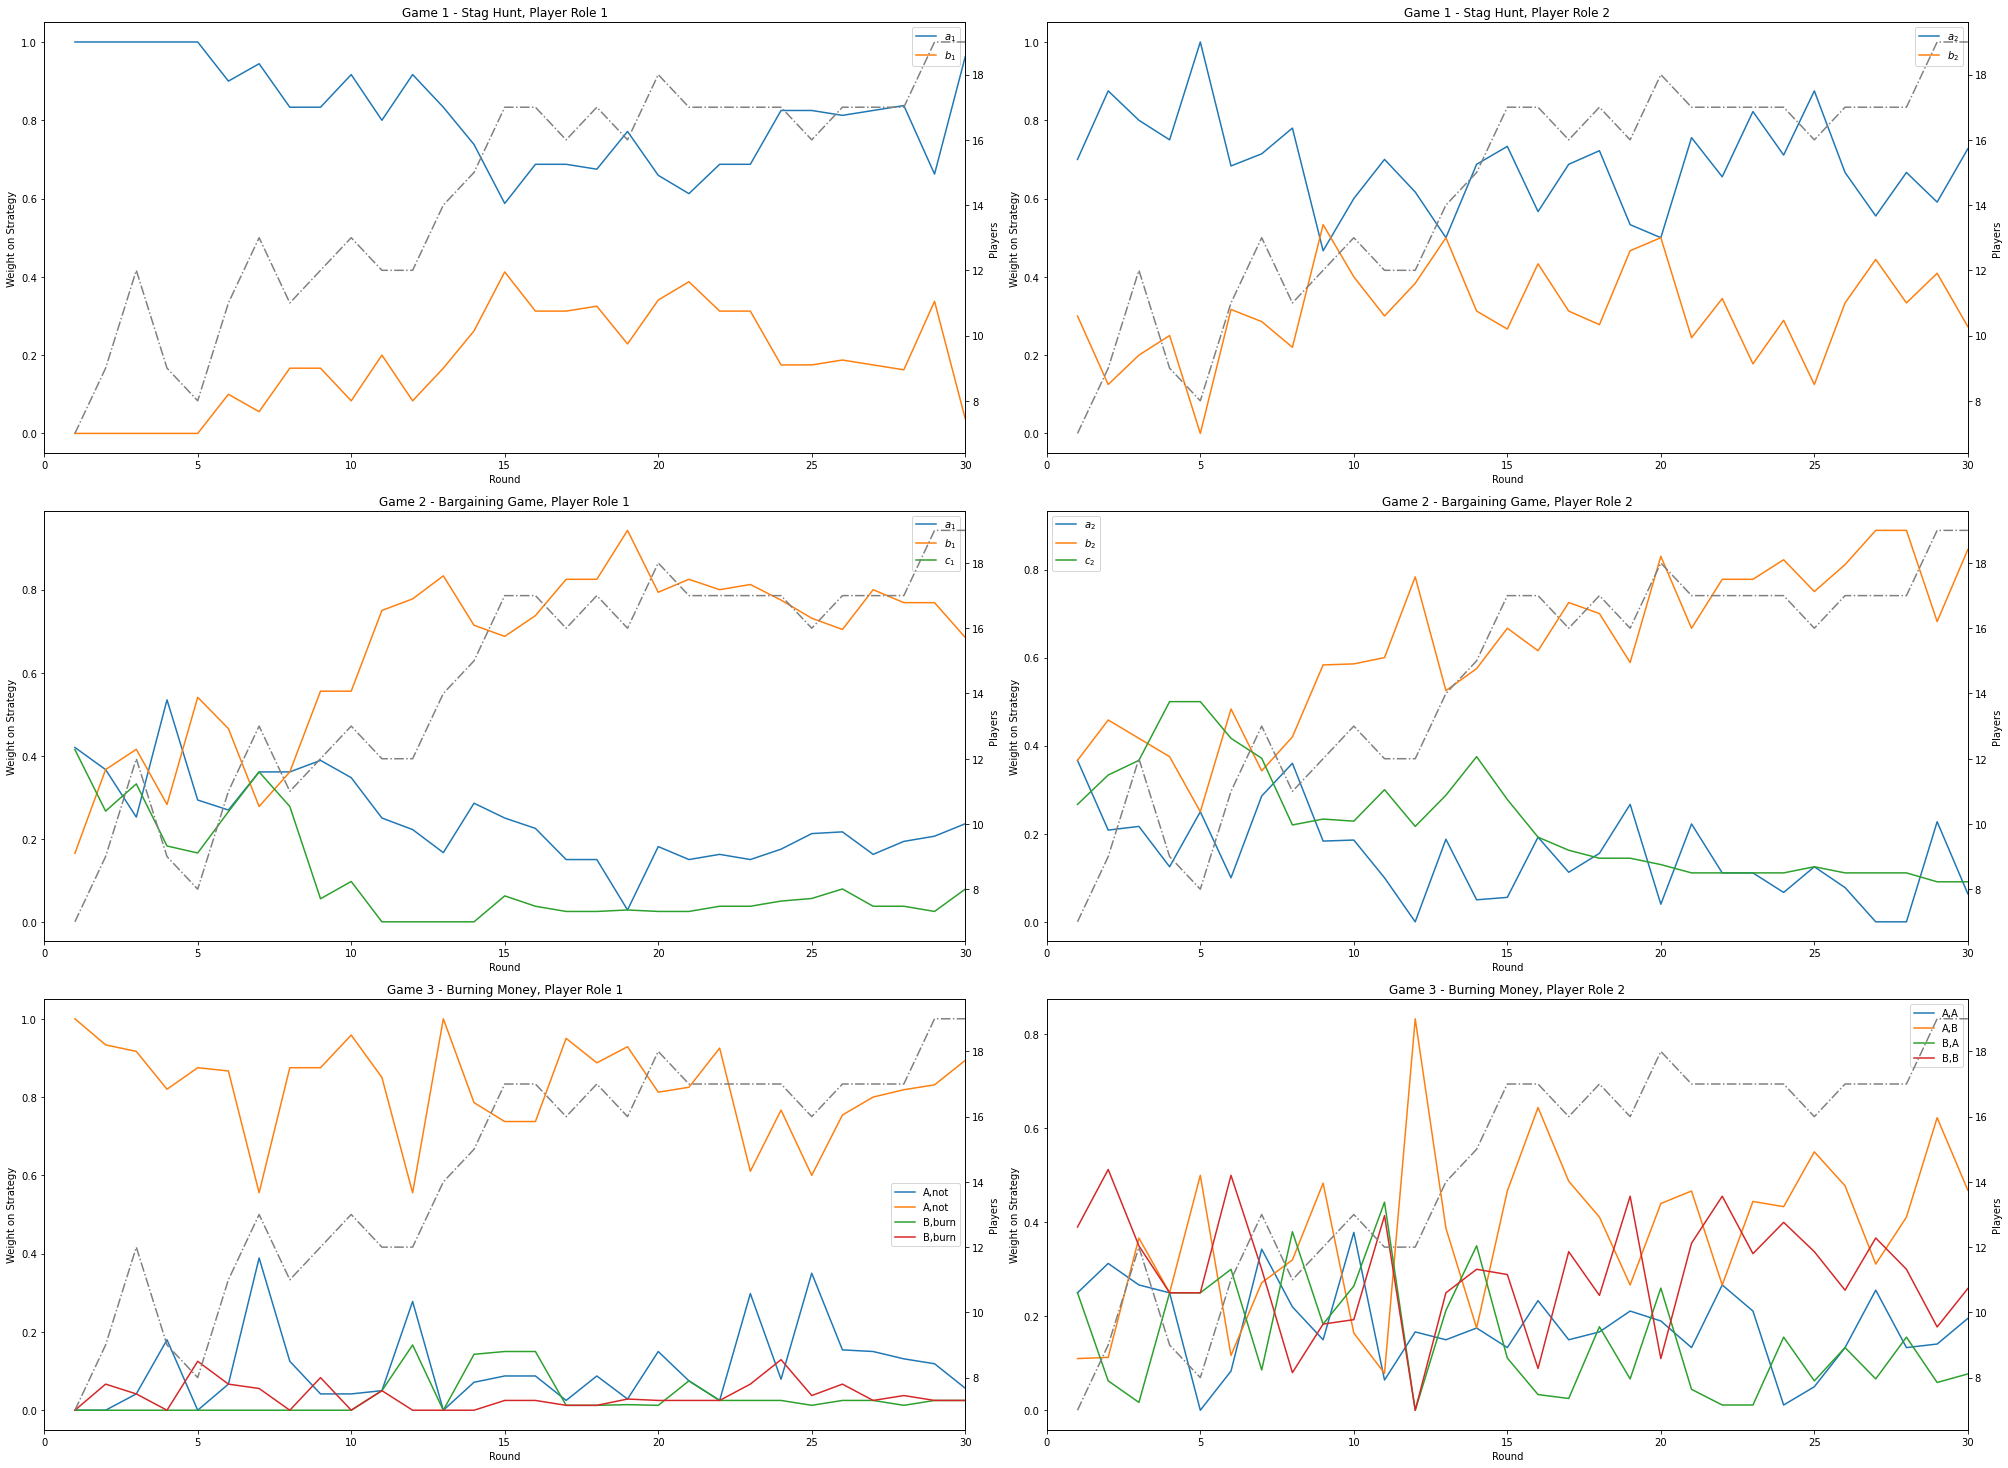

In [42]:
y = np.arange(len(all_choices['round'][all_choices['gameid']==1].unique()))+1
#game_names = ['Unstable RPS', 'Centipede Game', 'Forward Induction Made Difficult']
#label_g1 = [['Rock','Paper','Scissors'],['Rock','Paper','Scissors']]
#label_g2 = [['1','3','5','7','9'],['2','4','6','8','10']]
#label_g3 = [['T','M','B','Out'],['L','C','R']]

# game_names = ['Stag Hunt after Eliminating Dominated Strategies', 'Traveler’s Dilemma']
# label_g1 = [['$a_1$','$b_1$','$c_1$'],['$a_2$','$b_2$','$c_2$']]
# label_g2 = [['$a_1$','$b_1$','$c_1$','$d_1$'],['$a_2$','$b_2$','$c_2$','$d_2$']]

game_names = ['Stag Hunt', 'Bargaining Game', 'Burning Money']
label_g1 = [['$a_1$','$b_1$'],['$a_2$','$b_2$']]
label_g2 = [['$a_1$','$b_1$','$c_1$'],['$a_2$','$b_2$','$c_2$']]
label_g3 = [['A,not','A,not','B,burn','B,burn'],['A,A','A,B','B,A','B,B']]

strat_labels = [label_g1, label_g2, label_g3] 
fig, axs = plt.subplots(len(all_games.id), 2)
fig.set_size_inches(28, 20.5)

for gid in all_games.id.unique():
    avg_strats = [list(map(list,zip(*all_pasts.currentsp1[all_pasts['gameid']==gid]))) , list(map(list,zip(*all_pasts.currentsp2[all_pasts['gameid']==gid])))]
    n_players = all_pasts.plays[all_pasts['gameid']==gid].reset_index(drop=True)
    for i in range(0,2):
        for j in range(0,int(all_games[f"p{i+1}"][all_games['id']==gid])):
            axs[gid-1, i].plot(y,avg_strats[i][j], label=strat_labels[gid-1][i][j])
            axs[gid-1, i].set_title(f"Game {gid} - {game_names[gid-1]}, Player Role {i+1}")
        axs[gid-1, i].set_xlabel('Round')
        axs[gid-1, i].set_ylabel('Weight on Strategy')
        axs[gid-1, i].legend()
        axs[gid-1, i].set_xlim([0, 30])
        axst = axs[gid-1, i].twinx()
        axst.plot(y,n_players,linestyle='-.', color='gray')
        axst.set_ylabel('Players')

fig.tight_layout()

Now instead, distance to equilibrium

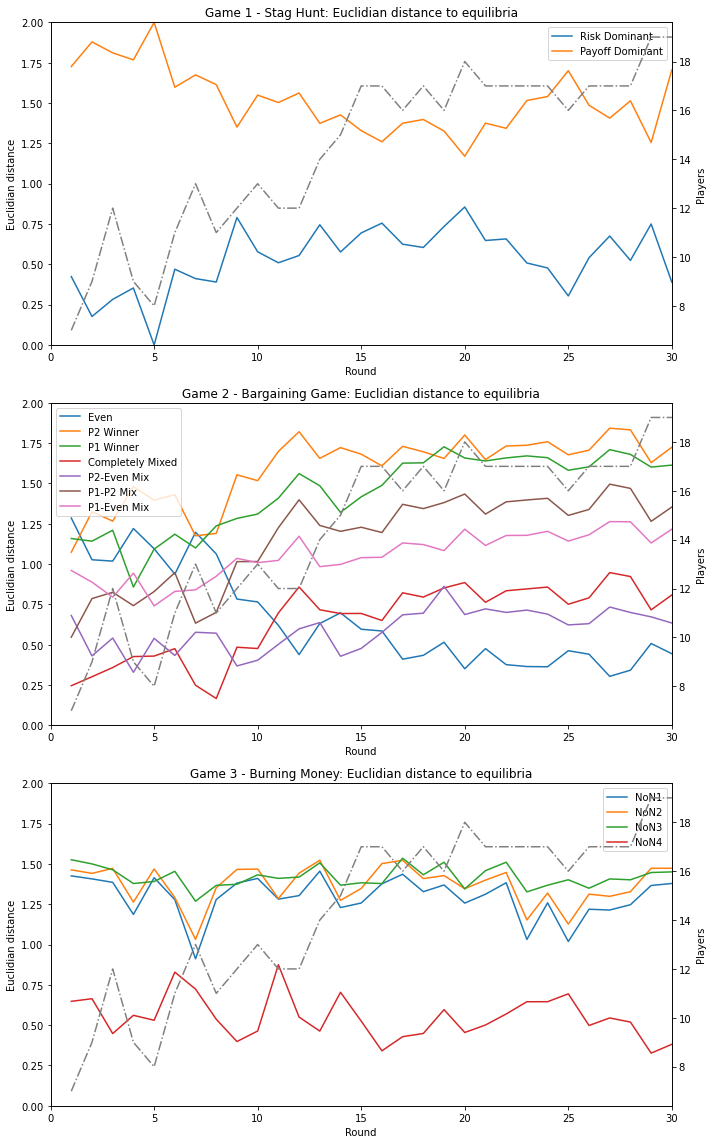

In [51]:
from scipy.optimize import minimize
import functools


# eq_game1 = [[[1/4,1/4,1/2],[1/4,1/4,1/2]]]
# eq_names1 = ['RPS']
# eq_game2 = [[[1,0,0,0,0],[1,0,0,0,0]]]
# eq_names2 = ['1,2']
# eq_game3 = ['c1']
# eq_names3 = ['Out,Mixed']

# eq_game1 = [[[0,1,0],[0,1,0]],[[0,0,1],[0,0,1]]]
# eq_names1 = ['Risk Dominant','Payoff Dominant']
# eq_game2 = [[[1,0,0,0],[1,0,0,0]]]
# eq_names2 = ['Strict Equilibrium']

eq_game1 = [[[1,0],[1,0]],[[0,1],[0,1]]]
eq_names1 = ['Risk Dominant','Payoff Dominant']
eq_game2 = [[[0,1,0],[0,1,0]],[[0,0,1],[1,0,0]],[[1,0,0],[0,0,1]],[[63/143,  45/143,  35/143],[63/143,  45/143,  35/143]],[[7/12, 5/12 ,0],[0,9/16, 7/16]],[[9/14, 0, 5/14],[9/14, 0, 5/14]],[[0,9/16, 7/16],[7/12, 5/12,1]]]
eq_names2 = ['Even','P2 Winner', 'P1 Winner','Completely Mixed','P2-Even Mix','P1-P2 Mix','P1-Even Mix']
eq_game3 = ['cb1','cb2','cb3','cb4']
eq_names3 = ['NoN1','NoN2','NoN3','NoN4']
eq_games = [eq_game1,eq_game2,eq_game3] 
eq_names = [eq_names1,eq_names2,eq_names3] 

fig, axs = plt.subplots(len(all_games.id), 1)    
fig.set_size_inches(10, 16)

for gid in all_games.id.unique():
    avg_strats = [list(map(list,zip(*all_pasts.currentsp1[all_pasts['gameid']==gid]))) , list(map(list,zip(*all_pasts.currentsp2[all_pasts['gameid']==gid])))]
    n_players = all_pasts.plays[all_pasts['gameid']==gid].reset_index(drop=True)
    for k in range(0,len(eq_games[gid-1])):
        if eq_games[gid-1][k]=='c1':
            
            def fun(a,b,c,x):
                return (x[0]-a)**2+(x[1]-b)**2+(x[2]-c)**2
            cineq1 = {'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] -1}
            cineq2 = {'type': 'ineq', 'fun': lambda x: 3 - x[0] - 2*x[1]}
            cineq3 = {'type': 'ineq', 'fun': lambda x:  3 - 2*x[0] - 6*x[1]}
            cineq4 = {'type': 'ineq', 'fun': lambda x: 3 - 7*x[1] - x[2]}
            cons = (cineq1, cineq2, cineq3, cineq4)
            bnds = ((0, 1), (0, 1), (0,1))
            lfunc = lambda x: minimize(functools.partial(fun,x[0],x[1],x[2]), (1/3, 1/3,1/3), method='SLSQP', bounds=bnds, constraints=cons)
            wow = pd.DataFrame(avg_strats[1]).apply(lfunc)
            wow = [r.x for r in wow]
            wow = [list(x) for x in wow]
            eq1 = np.dot(np.array([[0,0,0,1]]).T,np.array([np.ones(len(all_choices['round'][all_choices['gameid']==gid].unique()))]))
            eq2 = np.array(wow).T
            
        elif eq_games[gid-1][k][0:2]=='cb':
        
            if eq_games[gid-1][k][2]=='1':
                eq1 = [[1,0,0,0]]
                cons = ({'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] + x[3] -1},{'type': 'eq', 'fun': lambda x:  x[2] + x[3] -3*x[0]-3*x[1]},{'type': 'ineq', 'fun': lambda x:  x[1] + 2*x[3] - 2*x[0]-x[2]})
                bnds = ((0, 1), (0, 1), (0,1),(0,1))
                func = lambda a,b,c,d,x: (x[2]-a)**2+(x[3]-b)**2+(x[2]-c)**2+(x[3]-d)**2
                lfunc = lambda x: minimize(functools.partial(func,x[0],x[1],x[2],x[3]), (1/4,1/4,1/4,1/4), method='SLSQP', bounds=bnds, constraints=cons)
            elif eq_games[gid-1][k][2]=='2':
                eq1 = [[1,0,0,0]]
                cons = ({'type': 'eq', 'fun': lambda x:  x[2] + x[3] -1})
                bnds = ((0, 1), (0, 1), (0,2/3),(1/3,1))
                func = lambda a,b,c,d,x: (x[2]-c)**2+(x[3]-d)**2+x[0]+x[1]
                lfunc = lambda x: minimize(functools.partial(func,x[0],x[1],x[2],x[3]), (1/4,1/4,1/4,1/4), method='SLSQP', bounds=bnds, constraints=cons)
            elif eq_games[gid-1][k][2]=='3':
                eq1 = [[0,0,0,1]]
                cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[2]  -1})
                bnds = ((0, 2/3), (1/3, 1),(0, 1), (0, 1))
                func = lambda a,b,c,d,x: (x[0]-a)**2+(x[2]-c)**2+x[1]+x[3]
                lfunc = lambda x: minimize(functools.partial(func,x[0],x[1],x[2],x[3]), (1/4,1/4,1/4,1/4), method='SLSQP', bounds=bnds, constraints=cons)
            else:
                eq1 = [[0,1,0,0]]
                cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] + x[2] + x[3] -1})
                bnds = ((0, 1), (0, 1), (0, 1), (0, 1))
                func = lambda a,b,c,d,x: (x[0]-a)**2+(x[1]-b)**2+x[2]+x[3]
                lfunc = lambda x: minimize(functools.partial(func,x[0],x[1],x[2],x[3]), (1/4,1/4,1/4,1/4), method='SLSQP', bounds=bnds, constraints=cons)
                
            wow = pd.DataFrame(avg_strats[1]).apply(lfunc)
            wow = [r.x for r in wow]
            eq1 = np.dot(np.array(eq1).T,np.array([np.ones(len(all_choices['round'][all_choices['gameid']==gid].unique()))]))
            eq2 = np.array([list(x) for x in wow]).T
            
        else:
            
            eq1 = np.dot(np.array([eq_games[gid-1][k][0]]).T,np.array([np.ones(len(all_choices['round'][all_choices['gameid']==gid].unique()))]))
            eq2 = np.dot(np.array([eq_games[gid-1][k][1]]).T,np.array([np.ones(len(all_choices['round'][all_choices['gameid']==gid].unique()))]))

        dist = np.sqrt(np.sum((eq1-avg_strats[0])**2, axis=0)+np.sum((eq2-avg_strats[1])**2, axis=0))      
        axs[gid-1].plot(y,dist, label=eq_names[gid-1][k])
            
    axs[gid-1].set_title(f"Game {gid} - {game_names[gid-1]}: Euclidian distance to equilibria")
    axs[gid-1].set_xlim([0, 30])
    axs[gid-1].set_ylim([0, 2])
    axs[gid-1].set_xlabel('Round')
    axs[gid-1].set_ylabel('Euclidian distance')
    axs[gid-1].legend()
    axst = axs[gid-1].twinx()
    axst.plot(y,n_players,linestyle='-.', color='gray')
    axst.set_ylabel('Players')
            
fig.tight_layout()            
            
